In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.shape

(5043, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [8]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [9]:
df.drop(columns=['color','actor_3_facebook_likes','actor_2_name' , 'actor_1_facebook_likes','actor_3_name','facenumber_in_poster','actor_2_facebook_likes','director_facebook_likes',
                'movie_imdb_link' ,'aspect_ratio' , 'plot_keywords' ], inplace=True)

In [10]:
df.head()

,director_name,num_critic_for_reviews,duration,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,NaN,NaN,NaN,NaN,NaN,7.1,0


In [11]:
df.isnull().sum()

,0
director_name,104
num_critic_for_reviews,50
duration,15
gross,884
genres,0
actor_1_name,7
movie_title,0
num_voted_users,0
cast_total_facebook_likes,0
num_user_for_reviews,21


In [12]:
df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].mean(), inplace=True)
df['duration'].fillna(df['duration'].mean(), inplace=True)
df['gross'].fillna(df['gross'].mean(), inplace=True)
df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].mean(), inplace=True)
df['budget'].fillna(df['budget'].mean(), inplace=True)

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

,0
director_name,0
num_critic_for_reviews,0
duration,0
gross,0
genres,0
actor_1_name,0
movie_title,0
num_voted_users,0
cast_total_facebook_likes,0
num_user_for_reviews,0


In [15]:
df['main_genres'] = df['genres'].str.split('|').str[0]

In [16]:
df.drop(columns=['genres'], inplace=True)

In [17]:
Profit_in_millions = df['gross'] - df['budget']
Profit_in_millions = Profit_in_millions / 1000000
df['Profit_in_millions'] = round(Profit_in_millions,0)

In [18]:
df['title_year'] = df['title_year'].astype(int)

In [19]:
df.head()

,director_name,num_critic_for_reviews,duration,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,main_genres,Profit_in_millions
0,James Cameron,723.0,178.0,760505847.0,CCH Pounder,Avatar,886204,4834,3054.0,English,USA,PG-13,237000000.0,2009,7.9,33000,Action,524.0
1,Gore Verbinski,302.0,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,1238.0,English,USA,PG-13,300000000.0,2007,7.1,0,Action,9.0
2,Sam Mendes,602.0,148.0,200074175.0,Christoph Waltz,Spectre,275868,11700,994.0,English,UK,PG-13,245000000.0,2015,6.8,85000,Action,-45.0
3,Christopher Nolan,813.0,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,2701.0,English,USA,PG-13,250000000.0,2012,8.5,164000,Action,198.0
5,Andrew Stanton,462.0,132.0,73058679.0,Daryl Sabara,John Carter,212204,1873,738.0,English,USA,PG-13,263700000.0,2012,6.6,24000,Action,-191.0


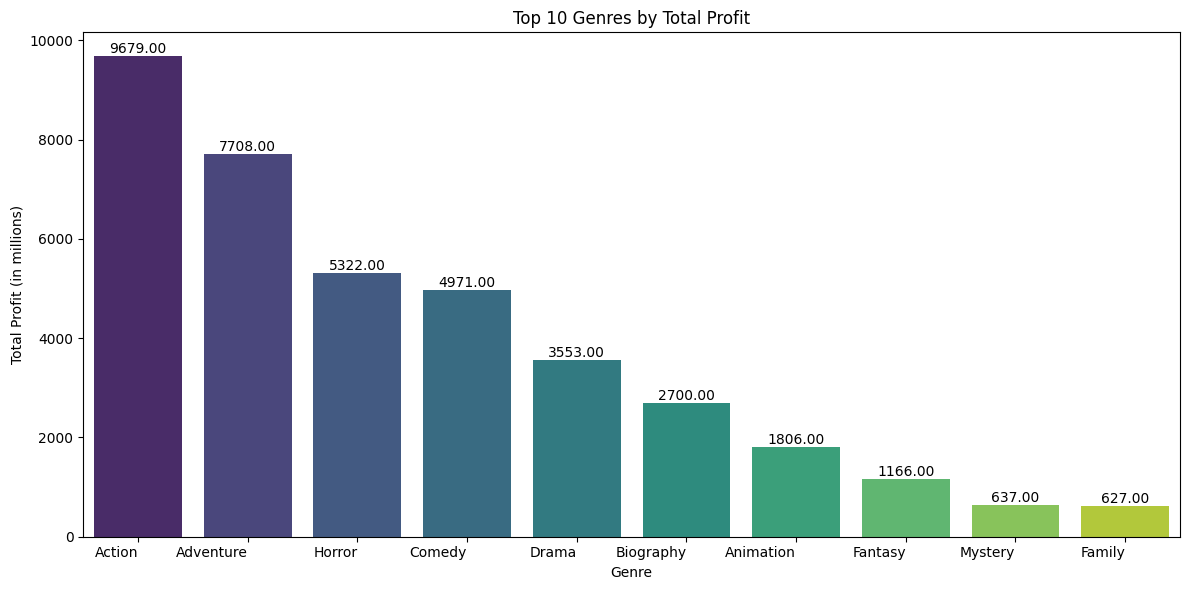

In [20]:
top_10_genres = df.groupby('main_genres')['Profit_in_millions'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='viridis')
plt.title('Top 10 Genres by Total Profit')
plt.xlabel('Genre')
plt.ylabel('Total Profit (in millions)')
plt.xticks(rotation=0, ha='right')

# Add profit values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

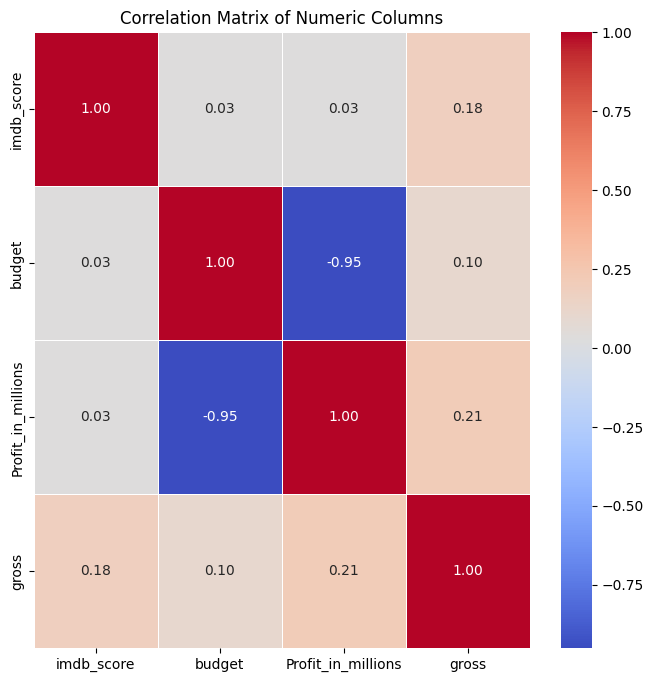

In [21]:
corr_df = df[['imdb_score','budget' ,'Profit_in_millions' , 'gross']]

plt.figure(figsize=(8, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f" , linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

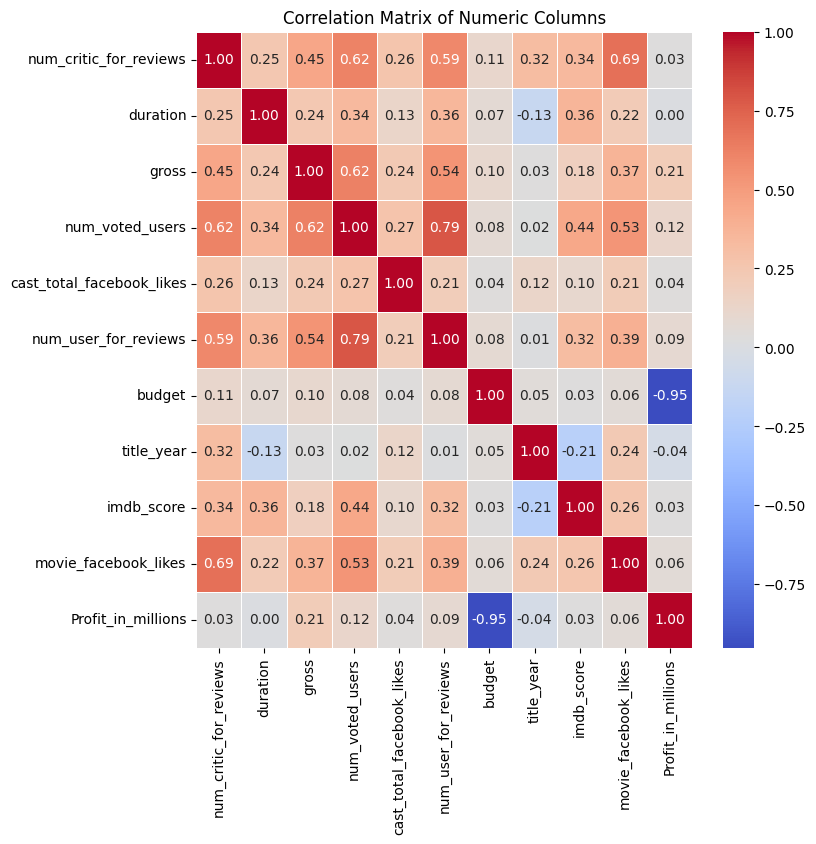

In [22]:
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8, 8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f" , linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

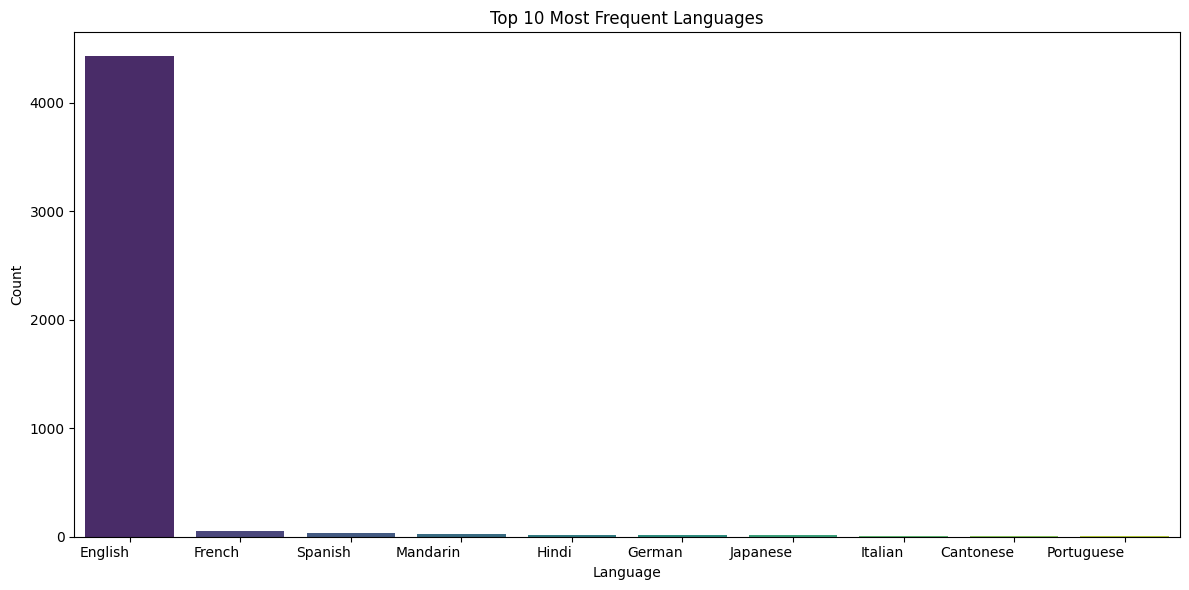

<Figure size 640x480 with 0 Axes>

In [23]:
# Get top 10 most frequent languages
top_10_languages = df['language'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
ay = sns.barplot(x=top_10_languages.index, y=top_10_languages.values, palette='viridis')
plt.title('Top 10 Most Frequent Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

for container in ay.containers:
    ay.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

In [24]:
import plotly.express as px


top_dict = df.groupby('director_name')['Profit_in_millions'].sum().sort_values(ascending = False  ).head(10)


fig = px.bar(df,x=top_dict.index, y=top_dict.values , title='Top 10 Directors by Total Profit' , text=top_dict.values)
fig.update_layout(xaxis_title='Director', yaxis_title='Total Profit (in millions)')
fig.update_traces(textposition='outside')
fig.show()

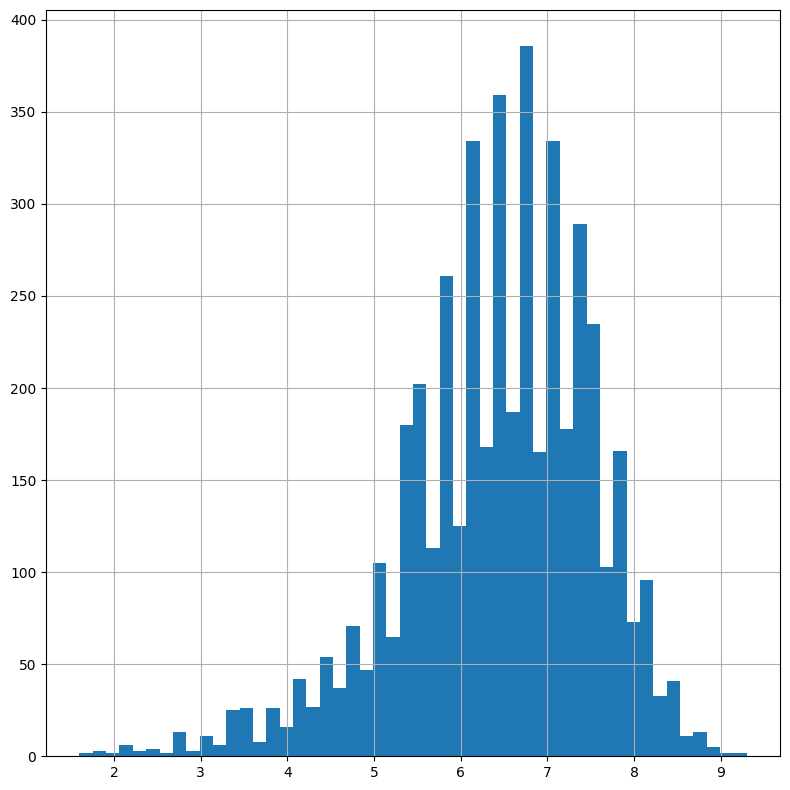

In [25]:
df['imdb_score'].hist(bins=50, figsize=(8,8))
plt.tight_layout()
plt.show()

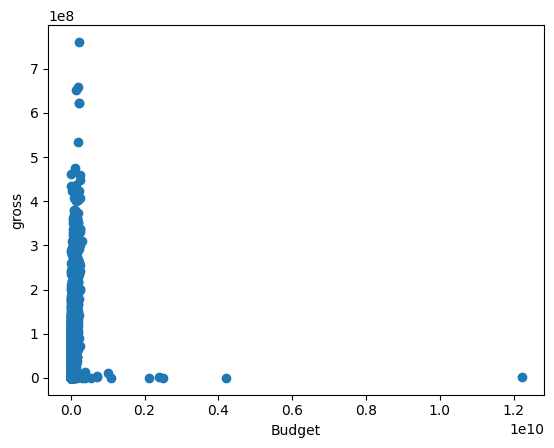

In [26]:
plt.scatter(df['budget'] , df['gross'])
plt.xlabel('Budget')
plt.ylabel('gross')
plt.show()

In [27]:
df[['duration', 'Profit_in_millions']].corr()

,duration,Profit_in_millions
duration,1.000000,0.004872
Profit_in_millions,0.004872,1.000000


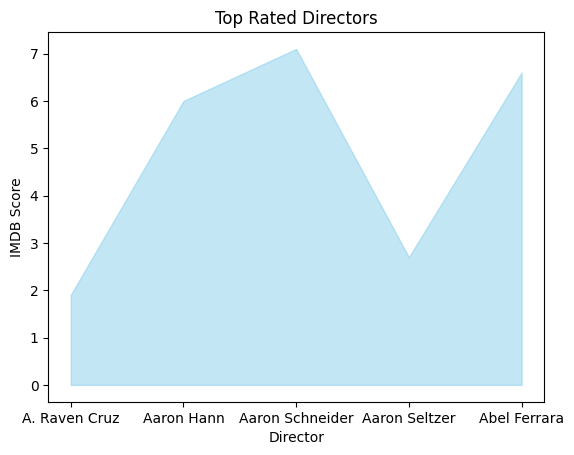

In [28]:
top_rated_dict = df.groupby('director_name')['imdb_score'].mean().head(5)

x=top_rated_dict.index
y=top_rated_dict.values

plt.fill_between(x , y, color='skyblue', alpha=0.5 )
plt.xlabel('Director')
plt.ylabel('IMDB Score')
plt.title('Top Rated Directors')
plt.show()

In [70]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [74]:
X = df[['num_critic_for_reviews' , 'duration'  , 'num_voted_users' , 'cast_total_facebook_likes' ,
        'num_user_for_reviews', 'language' , 'content_rating' ,'budget' , 'imdb_score' , 'movie_facebook_likes' ,
        'main_genres' ]]

y = df['Profit_in_millions']

In [75]:
X['language'] = lb.fit_transform(X['language'])
X['content_rating'] = lb.fit_transform(X['content_rating'])
X['main_genres'] = lb.fit_transform(X['main_genres'])

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [78]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.2f}')

RMSE: 45.33
MAE: 31.57
R² Score: 0.86


In [79]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
# Evaluation
print(f'RF R² Score: {r2_score(y_test, y_rf_pred):.2f}')

RF R² Score: 0.88


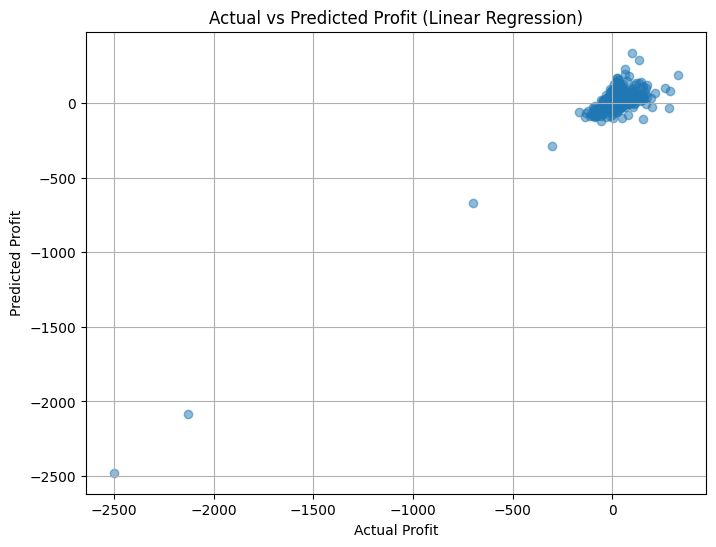

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit (Linear Regression)")
plt.grid(True)
plt.show()


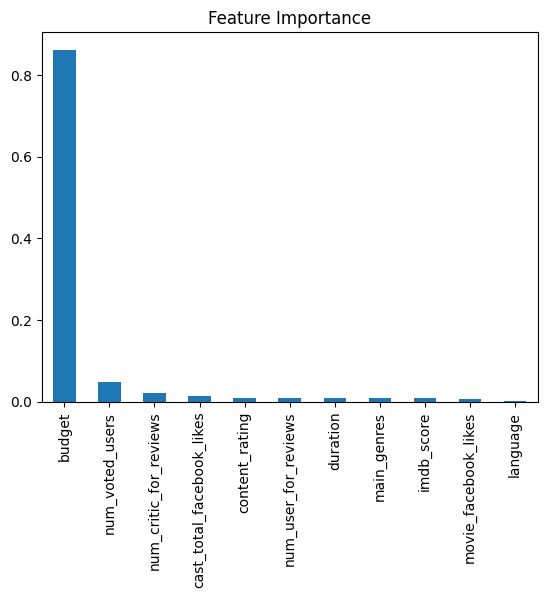

In [82]:
importances = rf.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importance')
plt.show()